In [105]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage


In [78]:
# !pip install memory_profiler


In [108]:
filename = 'amazon2.txt'
amazon = nx.read_edgelist(filename)
total_nodes = amazon.number_of_nodes()
list_count = total_nodes * 0.1
print(round(list_count))

21


In [109]:
# Function to calculate degree, betweenness, and closeness centrality
def calculate_centralities(graph):
    # Degree centrality
    degree_centralities = nx.degree_centrality(graph)
    sorted_degree_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:25]
    
    # Betweenness centrality
    betweenness_centralities = nx.betweenness_centrality(graph)
    sorted_betweenness_nodes = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:25]
    
    # Closeness centrality
    closeness_centralities = nx.closeness_centrality(graph)
    sorted_closeness_nodes = sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)[:25]
    
    return sorted_degree_nodes, sorted_betweenness_nodes, sorted_closeness_nodes

def find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes):
    common_nodes = set(top_degree_nodes).union(set(top_betweenness_nodes), set(top_closeness_nodes))
    return list(common_nodes)


In [110]:

start = time.time()
top_degree_nodes, top_betweenness_nodes, top_closeness_nodes = calculate_centralities(amazon)
# len(top_degree_nodes)
# Find common nodes
common_nodes = find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes)
end = time.time()
# print(common_nodes)
# print("Top 10 nodes by degree centrality:", top_degree_nodes)
# print("Top 10 nodes by betweenness centrality:", top_betweenness_nodes)
# print("Top 10 nodes by closeness centrality:", top_closeness_nodes)


In [111]:
len(common_nodes)

40

In [112]:
time = end - start
print(time)

0.13779354095458984


In [113]:
mem_usage = memory_usage((independent_cascade_model.propagate, (common_nodes,), {'threshold': 1}))
max_mem_usage = max(mem_usage)
print("Max memory usage:", max_mem_usage, "MB")

Max memory usage: 84.5 MB


In [114]:
class IndependentCascadeModel:
    def __init__(self, graph):
        self.graph = graph

    def propagate(self, common_nodes, threshold=1):
        active_nodes = set(common_nodes)
        newly_activated_nodes = set(common_nodes)
        while newly_activated_nodes:
            next_newly_activated_nodes = set()
            for node in newly_activated_nodes:
                neighbors = list(self.graph.neighbors(node))
                for neighbor in neighbors:
                    if neighbor not in active_nodes:
                        indegree = self.graph.degree(neighbor)
                        propagation_prob = threshold / indegree if indegree > 0 else 0
                        if random.random() < propagation_prob:
                            next_newly_activated_nodes.add(neighbor)
                            active_nodes.add(neighbor)
            newly_activated_nodes = next_newly_activated_nodes
        return active_nodes


independent_cascade_model = IndependentCascadeModel(amazon)
influenced_nodes = independent_cascade_model.propagate(common_nodes)

In [115]:
len(influenced_nodes)

119

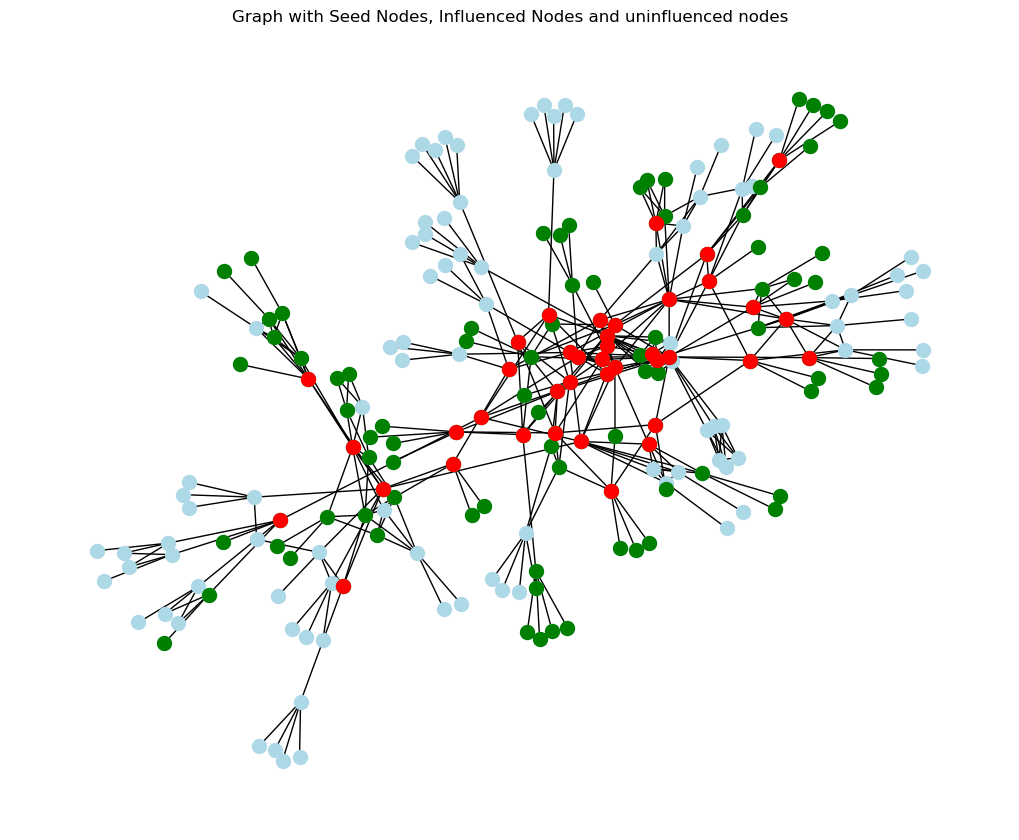

In [117]:
pos = nx.spring_layout(amazon)
plt.figure(figsize=(10, 8))
nx.draw(amazon, pos, with_labels=False, node_color='lightblue', node_size=100)
nx.draw_networkx_nodes(amazon, pos, nodelist=influenced_nodes, node_color='green', node_size=100)
nx.draw_networkx_nodes(amazon, pos, nodelist=common_nodes, node_color='red', node_size=100)
plt.title("Graph with Seed Nodes, Influenced Nodes and uninfluenced nodes")
plt.show()

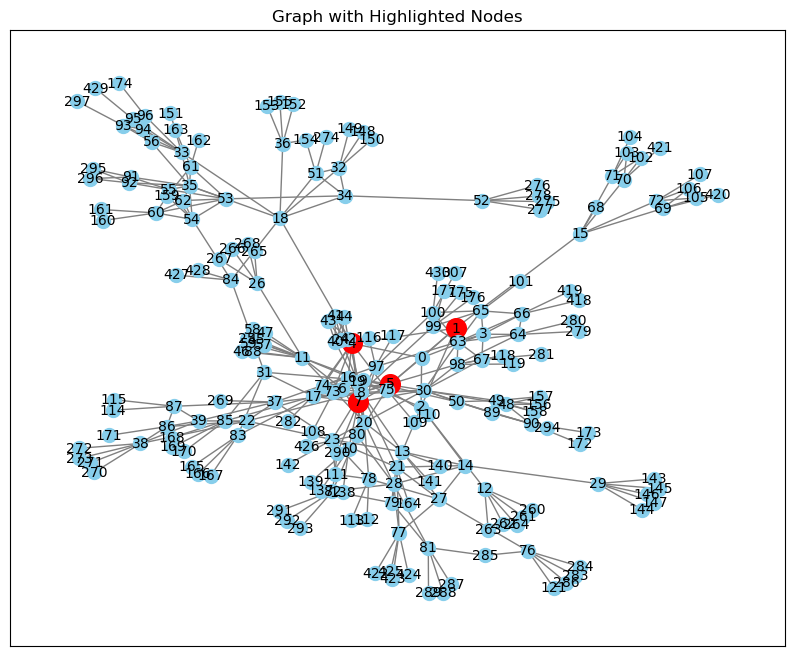

In [18]:
highlight_nodes = ['1', '4', '5', '7']

# Visualize the graph with highlighted nodes
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Layout for visualization

# Draw nodes and edges
nx.draw_networkx_edges(graph, pos, edge_color='gray')

# Draw nodes with different colors for highlighted nodes
nx.draw_networkx_nodes(graph, pos, nodelist=highlight_nodes, node_color='red', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=[node for node in graph.nodes() if node not in highlight_nodes], node_color='skyblue', node_size=100)

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_color='black', font_size=10)

plt.title("Graph with Highlighted Nodes")
plt.show()

In [ ]:
# Comparison

In [122]:
# Determining seed set usng greedy approach
def greedy_influence_maximization(network, k):
    seed_set = set()
    while len(seed_set) < k:
        best_node = None
        max_increase = -1
        for node in network.nodes:
            if node not in seed_set:
                # Simulate adding the node to the seed set and calculate influence spread
                current_seed_set = seed_set.copy()
                current_seed_set.add(node)
                influence_spread = simulate_influence_spread(network, current_seed_set)
                increase = influence_spread - len(seed_set)
                if increase > max_increase:
                    max_increase = increase
                    best_node = node
        seed_set.add(best_node)
    return seed_set

# Monte Carlo simulation for influence spread
def simulate_influence_spread(network, seed_set, iterations = 100):
    total_influenced = 0
    for _ in range(iterations):
        influenced_nodes = set(seed_set)
        for node in seed_set:
            influenced_nodes.update(nx.node_connected_component(network, node))
        total_influenced += len(influenced_nodes)
    return total_influenced / iterations

In [120]:
import time

In [ ]:
start_time = time.time()
seed_set = greedy_influence_maximization(amazon, 25)
total = simulate_influence_spread(amazon, seed_set, 10 )
end_time = time.time()
print("Time" , end_time - start_time)

In [ ]:
class IndependentCascadeModel:
    def __init__(self, graph):
        self.graph = graph

    def propagate(self, common_nodes, threshold=1):
        active_nodes = set(common_nodes)
        newly_activated_nodes = set(common_nodes)
        while newly_activated_nodes:
            next_newly_activated_nodes = set()
            for node in newly_activated_nodes:
                neighbors = list(self.graph.neighbors(node))
                for neighbor in neighbors:
                    if neighbor not in active_nodes:
                        indegree = self.graph.degree(neighbor)
                        propagation_prob = threshold / indegree if indegree > 0 else 0
                        if random.random() < propagation_prob:
                            next_newly_activated_nodes.add(neighbor)
                            active_nodes.add(neighbor)
            newly_activated_nodes = next_newly_activated_nodes
        return active_nodes


independent_cascade_model = IndependentCascadeModel(amazon)
influenced_nodes = independent_cascade_model.propagate(seed_set)